<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/Bioinformatics/blob/master/orIC_prediction_using_CNN_Regularisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of replication origins by calculating DNA structural properties

Dataset Obtained from http://lin-group.cn/server/iORI-PseKNC2.0/index.html

In [2]:
!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/positive-sequences.txt
!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/negative-sequences.txt
!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/90_sdandard.txt

--2021-02-22 16:33:49--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/positive-sequences.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123928 (121K) [text/plain]
Saving to: ‘positive-sequences.txt.1’

positive-sequences. 100%[===================>] 121.02K  --.-KB/s    in 0.01s   

2021-02-22 16:33:49 (9.76 MB/s) - ‘positive-sequences.txt.1’ saved [123928/123928]

--2021-02-22 16:33:49--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/negative-sequences.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, a

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np
import seaborn as sns

In [4]:
parameters=open("/content/90_sdandard.txt")
data_parameters=pd.read_csv(parameters,delimiter="\t")

In [5]:
data_parameters.head()

,Physicochemical properties,GG,GA,GC,GT,AG,AA,AC,AT,CG,CA,CC,CT,TG,TA,TC,TT
0,Base stacking,-0.07,-0.65,-2.46,-0.92,0.49,1.02,-0.92,0.57,-0.58,0.57,-0.07,0.49,0.57,1.60,-0.65,1.02
1,Protein induced deformability,0.36,-0.14,-0.30,-0.83,-0.89,-0.64,-0.83,-1.05,2.23,1.51,0.36,-0.89,1.51,0.42,-0.14,-0.64
2,B-DNA twist,-0.06,1.11,0.79,-0.65,-1.33,0.00,-0.65,2.09,-1.14,0.60,-0.06,-1.33,0.60,-1.06,1.11,0.00
3,Dinucleotide GC Content,1.37,0.00,1.37,0.00,0.00,-1.37,0.00,-1.37,1.37,0.00,1.37,0.00,0.00,-1.37,0.00,-1.37
4,A-philicity,-1.19,1.02,0.32,-1.36,-0.80,0.99,-1.36,-0.10,-0.27,1.19,-1.19,-0.80,1.19,0.32,1.02,0.99


In [6]:
data_parameters.describe()

,GG,GA,GC,GT,AG,AA,AC,AT,CG,CA,CC,CT,TG,TA,TC,TT
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.222222,-0.022333,0.375333,0.145000,-0.178000,0.020111,0.180333,0.056889,0.052889,-0.237667,0.168889,-0.138111,-0.260222,-0.415889,-0.039889,0.068889
std,0.952184,0.548620,1.207512,0.918965,0.697511,0.957133,0.907413,1.197706,1.294959,0.864546,0.973112,0.703265,0.866836,1.261291,0.555800,0.916169
min,-1.690000,-1.370000,-2.460000,-2.100000,-1.750000,-2.020000,-2.100000,-2.380000,-2.870000,-1.970000,-1.690000,-1.750000,-1.970000,-2.370000,-1.370000,-2.020000
25%,-0.530000,-0.390000,-0.395000,-0.560000,-0.617500,-0.770000,-0.490000,-0.877500,-1.035000,-0.860000,-0.660000,-0.552500,-0.897500,-1.370000,-0.407500,-0.692500
50%,0.155000,-0.035000,0.335000,0.125000,-0.125000,0.050000,0.145000,-0.050000,-0.040000,-0.245000,0.030000,-0.120000,-0.300000,-0.680000,-0.035000,0.075000
75%,1.080000,0.277500,1.370000,0.970000,0.150000,0.587500,1.000000,1.022500,1.335000,0.245000,1.050000,0.215000,0.280000,0.382500,0.277500,0.650000
max,2.080000,1.230000,2.520000,1.660000,1.590000,2.520000,1.660000,3.160000,2.360000,2.010000,2.080000,1.590000,2.010000,3.420000,1.230000,2.200000


In [7]:
positive_sequences=open("/content/positive-sequences.txt","r")
negative_sequences=open("/content/negative-sequences.txt","r")

In [8]:
p_data=positive_sequences.readlines()
n_data=negative_sequences.readlines()

In [9]:
len(p_data)+len(n_data)

1622

In [10]:
p_data=p_data[1::2]
n_data=n_data[1::2]

In [72]:
x_data=[]
y_data=[]
for seq in range(len(p_data)):
  seq_data=np.zeros(90)
  for pos in range(0,298):
    seq_data+=np.array(data_parameters[p_data[seq][pos:pos+2]])
  x_data.append(seq_data)
  y_data.append(1) 

In [73]:
for seq in range(len(n_data)):
  seq_data=np.zeros(90)
  for pos in range(0,298):
    seq_data+=np.array(data_parameters[n_data[seq][pos:pos+2]])
  x_data.append(seq_data)
  y_data.append(0) 

# Data Exploration

In [75]:
y_data=np.array(y_data)

In [76]:
from sklearn.utils import shuffle
X, y = shuffle(x_data, y_data)
from sklearn.preprocessing import MinMaxScaler
X=MinMaxScaler().fit_transform(X)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [15]:
nucletide_pairs=np.array(data_parameters.columns)

In [16]:
zz=pd.DataFrame(X,columns=np.array(data_parameters["Physicochemical properties"]))
zz["result"]=MinMaxScaler().fit_transform(y_data.reshape(-1,1))

In [17]:
zz=data_parameters.set_index("Physicochemical properties").transpose()

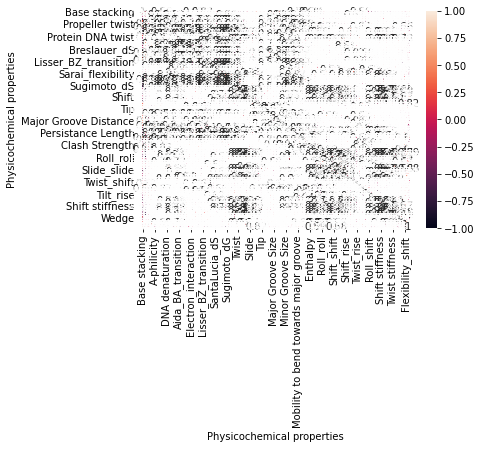

In [18]:
corrMatrix = zz.corr(method="pearson")
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [19]:
corrMatrix

Physicochemical properties,Base stacking,Protein induced deformability,B-DNA twist,Dinucleotide GC Content,A-philicity,Propeller twist,Duplex stability-free energy,Duplex stability-disrupt energy,DNA denaturation,Bending stiffness,Protein DNA twist,Stabilising energy of Z-DNA,Aida_BA_transition,Breslauer_dG,Breslauer_dH,Breslauer_dS,Electron_interaction,Hartman_trans_free_energy,Helix-Coil_transition,Ivanov_BA_transition,Lisser_BZ_transition,Polar_interaction,SantaLucia_dG,SantaLucia_dH,SantaLucia_dS,Sarai_flexibility,Stability,Stacking_energy,Sugimoto_dG,Sugimoto_dH,Sugimoto_dS,Watson-Crick_interaction,Twist,Tilt,Roll,Shift,Slide,Rise,Stacking energy,Bend,...,Persistance Length,Melting Temperature,Mobility to bend towards major groove,Mobility to bend towards minor groove,Propeller Twist,Clash Strength,Enthalpy,Free energy,Twist_twist,Tilt_tilt,Roll_roll,Twist_tilt,Twist_roll,Tilt_roll,Shift_shift,Slide_slide,Rise_rise,Shift_slide,Shift_rise,Slide_rise,Twist_shift,Twist_slide,Twist_rise,Tilt_shift,Tilt_slide,Tilt_rise,Roll_shift,Roll_slide,Roll_rise,Slide stiffness,Shift stiffness,Roll stiffness,Rise stiffness,Tilt stiffness,Twist stiffness,Wedge,Direction,Flexibility_slide,Flexibility_shift,Entropy
Physicochemical properties,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Base stacking,1.000000,0.048011,-0.176205,-0.673909,0.250612,-0.292577,0.564560,-0.348297,-0.890502,-0.466531,0.229268,-0.163855,-0.587383,-0.400469,-0.231340,-0.125923,-0.673909,0.826218,-0.400498,0.250612,0.826941,-0.673909,-0.807859,-0.684442,-0.518598,-0.025341,-0.862414,-0.999961,-0.592603,-0.639163,-0.608587,-0.673909,-0.236589,-0.359639,-0.672635,-0.025688,-0.325664,-0.652698,0.276796,0.407635,...,-0.466531,-0.965248,0.590250,-0.390308,-0.328103,0.124369,0.639163,0.739291,-0.162415,-0.428373,-0.441718,0.075421,-0.024967,0.046985,0.220218,-0.060256,-0.541841,-0.158897,-0.083354,-0.584990,0.098846,0.319970,0.382531,0.564422,0.428769,-0.159612,-0.217383,-0.409806,-0.678366,-0.325664,-0.025688,-0.672635,-0.652698,-0.359639,-0.236589,0.110393,-0.284241,0.176516,-0.117430,0.488914
Protein induced deformability,0.048011,1.000000,-0.034336,0.416526,0.294265,0.668622,-0.576001,0.575073,-0.223709,0.325758,0.682941,-0.918670,0.456142,0.500489,0.115542,-0.084724,0.416526,0.494059,0.498821,0.294265,0.491189,0.416526,0.399959,0.179097,0.041148,-0.263483,-0.274610,-0.042317,0.590401,0.458913,0.381356,0.416526,-0.893037,-0.640100,-0.672788,-0.485858,-0.555528,-0.645935,-0.239906,0.246283,...,0.325758,-0.159089,-0.340846,0.633492,0.374724,0.022090,-0.458913,-0.434621,-0.866884,-0.744924,-0.765842,-0.146828,-0.673509,0.011592,-0.011656,-0.678446,-0.659368,-0.448163,-0.220588,-0.535872,0.048199,0.674575,0.369727,-0.244262,0.433157,0.032892,-0.120889,0.435658,-0.544198,-0.555528,-0.485858,-0.672788,-0.645935,-0.640100,-0.893037,-0.113986,-0.034564,-0.749390,0.094178,-0.547666
B-DNA twist,-0.176205,-0.034336,1.000000,-0.136978,0.516900,-0.037622,0.166012,-0.160504,-0.068954,-0.121908,0.037634,0.280257,0.287889,-0.000726,-0.133944,-0.175955,-0.136978,-0.250995,-0.000529,0.516900,-0.250534,-0.136978,0.003733,0.082707,0.108426,0.420651,0.179995,0.174557,-0.172490,-0.088578,-0.047886,-0.136978,-0.033127,0.151913,0.320509,-0.125847,0.343143,0.474306,0.092301,-0.180224,...,-0.121908,0.183853,0.168150,-0.062421,-0.290000,-0.465502,0.088578,0.200904,-0.027228,0.230098,0.237993,0.202734,0.323376,0.189898,-0.151426,0.204175,0.541362,0.076025,0.113771,0.107977,0.055891,0.078290,0.282826,0.139167,-0.489840,-0.346738,0.353423,0.091696,0.082483,0.343143,-0.125847,0.320509,0.474306,0.151913,-0.033127,-0.185902,0.091730,0.115809,-0.770035,0.109991
Dinucleotide GC Content,-0.673909,0.416526,-0.136978,1.000000,-0.413914,0.762917,-0.941863,0.776537,0.706987,0.915315,-0.063827,-0.445864,0.440365,0.776537,0.497940,0.314281,1.000000,-0.431993,0.777782,-0.413914,-0.434287,1.000000,0.922953,0.319582,0.014600,-0.370542,0.474238,0.676860,0.924033,0.813383,0.714258

In [20]:
csv=corrMatrix.to_csv()

In [21]:
f1=open("corrMatrix.txt","w")
f1.write(csv)

162371

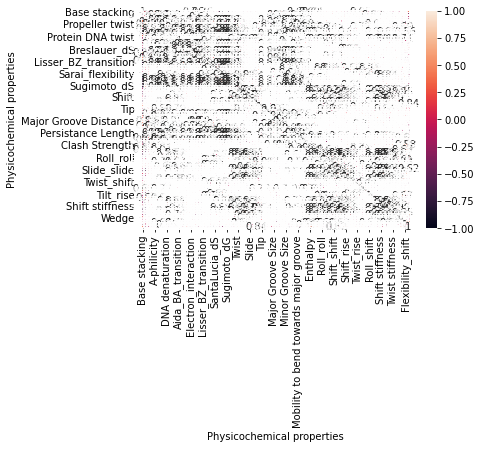

In [22]:
corrMatrix = zz.corr(method="spearman")
sns.heatmap(corrMatrix, annot=True)
plt.show()

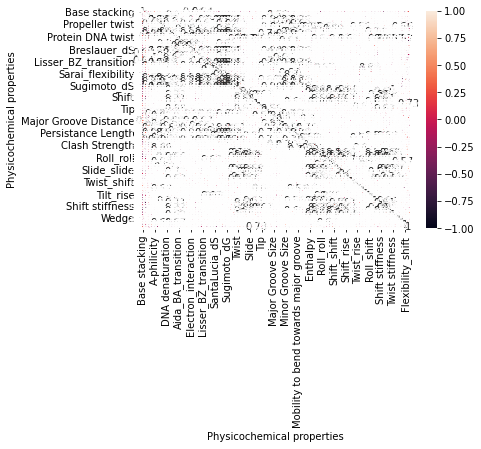

In [23]:
corrMatrix = zz.corr(method="kendall")
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [25]:
#result_corr=pd.Series(corrMatrix["result"])

In [27]:
#np.argsort(np.abs(np.array(result_corr)))

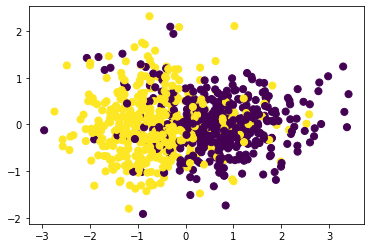

In [28]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2).fit(X)
x_pca=pca.transform(X)
plt.scatter(x_pca[:,0],x_pca[:,1],c=y,marker="o",s=50)

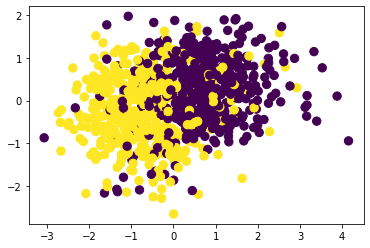

In [29]:
from sklearn.manifold import MDS
mds=MDS(n_components=2)
x_mds=mds.fit_transform(X)
plt.scatter(x_mds[:,0],x_mds[:,1],c=y,marker="o",s=70)

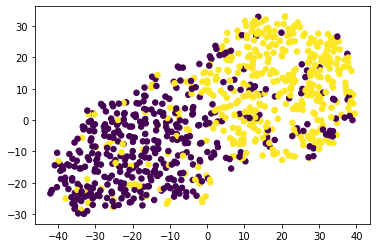

In [30]:
from sklearn.manifold import TSNE
tsne=TSNE(random_state=0)
x_tsne=tsne.fit_transform(X)
plt.scatter(x_tsne[:,0],x_tsne[:,1],c=y,s=30)

# Supervised ML 

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

In [32]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
param_grid = {'C':[0.0001,0.001,0.01,0.1,1,10,100]}
gs_logit = GridSearchCV(LogisticRegression(max_iter=10000),param_grid,scoring='roc_auc',cv=5)
gs_logit.fit(x_train,y_train)
gs_logit.best_params_

{'C': 1}

In [36]:
logit_best = gs_logit.best_estimator_
logit_best.fit(x_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
accuracy_score(logit_best.predict(x_test),y_test)

0.7804878048780488

In [37]:
y_test_proba = logit_best.predict_proba(x_test)
print('The auc score for the logit model on the test data is {}'.format(round(roc_auc_score(y_test,y_test_proba[:,1]),3)))

The auc score for the logit model on the test data is 0.89


In [38]:
precisions,recalls,thresholds = precision_recall_curve(y_test,y_test_proba[:,1])

In [39]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    ''' From Hands On Machine Learning with Scikit-Learn and TensorFlow by 
    Aurelien Geron
    '''
    plt.plot(thresholds,precisions[:-1],label='Precision')
    plt.plot(thresholds,recalls[:-1],label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='center left')
    plt.ylim([0,1])

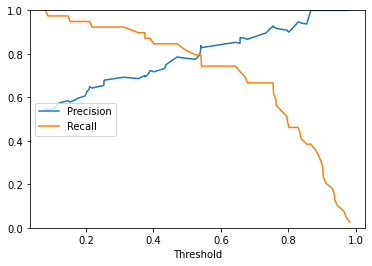

In [40]:
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)

In [41]:
from sklearn.metrics import confusion_matrix
predict_new = np.where(y_test_proba[:,1]>0.5,1,0)
print(confusion_matrix(y_test,predict_new))

[[34  9]
 [ 8 31]]


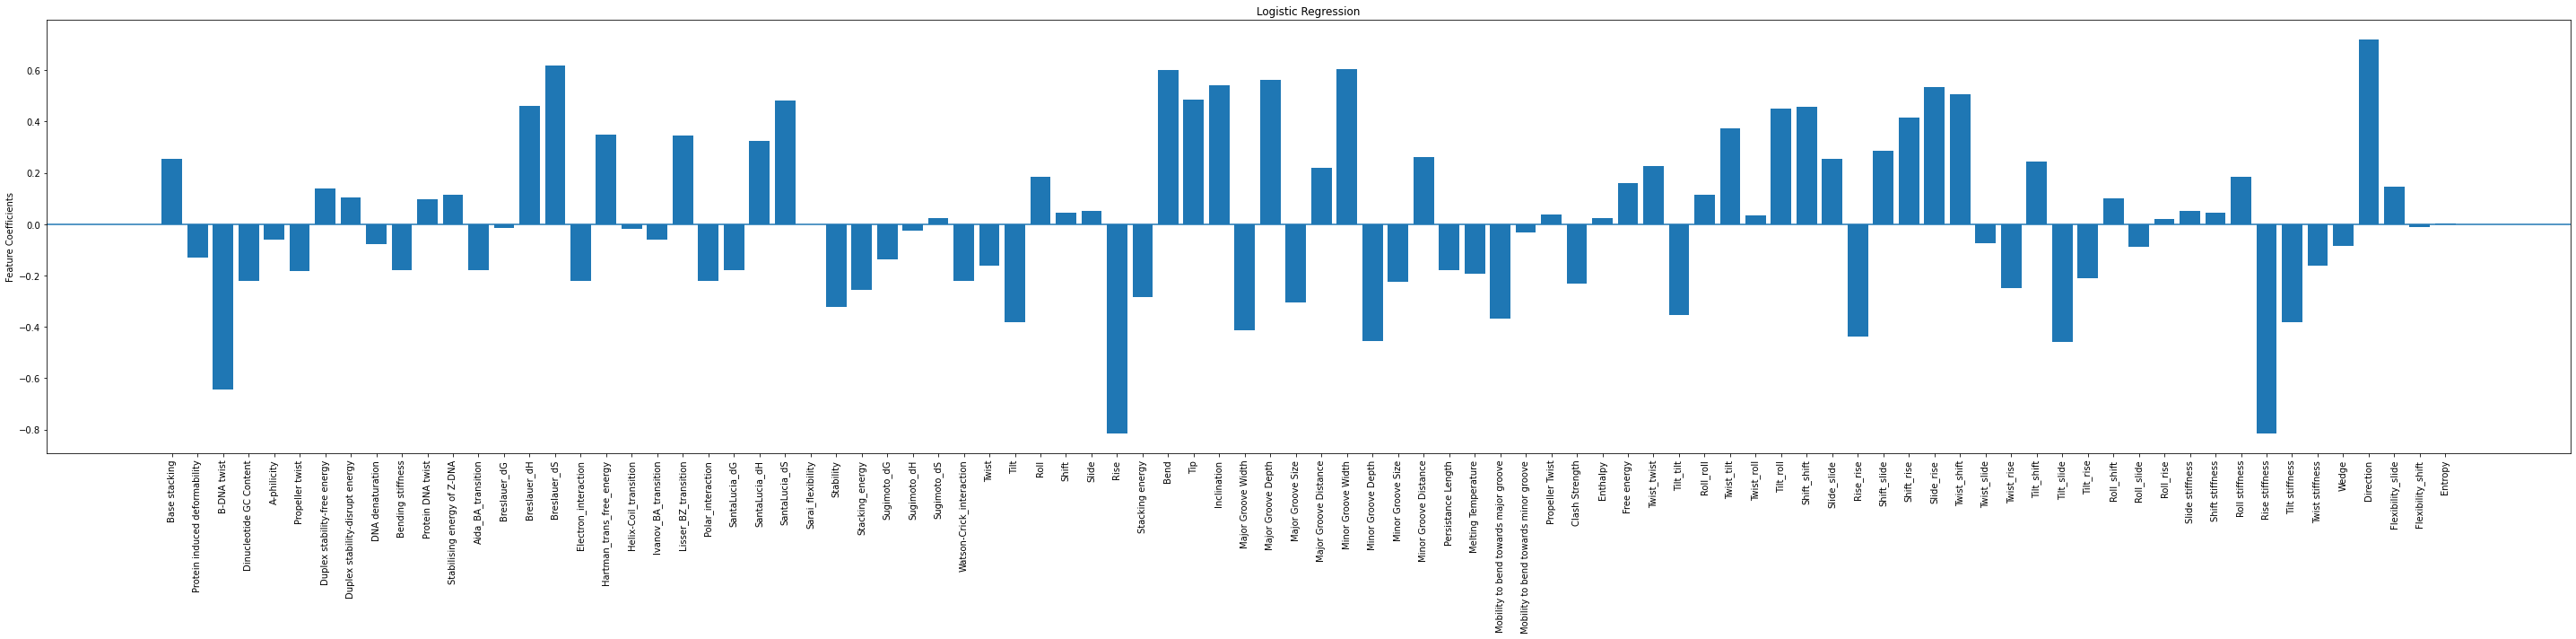

In [42]:
logit_coefs=logit_best.coef_
plt.figure(figsize=(40,10))
plt.bar(range(len(logit_coefs[0])),logit_coefs[0],align='center');
plt.axhline(y=0)
plt.ylabel('Feature Coefficients');
plt.title('Logistic Regression')
plt.xticks(range(0,len(zz.columns)),zz.columns)
plt.xticks(rotation=90);
plt.tight_layout()
plt.show()

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
degree=2
polyreg_scaled=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg_scaled.fit(X,y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [44]:
import xgboost as xgb
xg_clf = xgb.XGBClassifier()
xg_clf.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [77]:
param_grid = {'n_estimators':[50,100,250,500],'learning_rate':[0.1,0.25],'max_depth':[1,2,3],
             'subsample':[0.25,0.5,0.75], 'colsample_bytree':[0.1,0.5,1]}
gs_xgb = GridSearchCV(xgb.XGBClassifier(n_jobs=-1,),param_grid,cv=5,scoring='roc_auc')
gs_xgb.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.1, 0.5, 1],
                         'learning_rate': [0.1, 0.25], 'max_depth': [1, 2, 3],
                         'n_estimator

In [78]:
gs_xgb.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.1,
 'max_depth': 1,
 'n_estimators': 50,
 'subsample': 0.25}

In [79]:
best_xgb = gs_xgb.best_estimator_
best_xgb.fit(x_train,y_train)
y_test_proba = best_xgb.predict_proba(x_test)

In [80]:
xgb_importances = best_xgb.feature_importances_

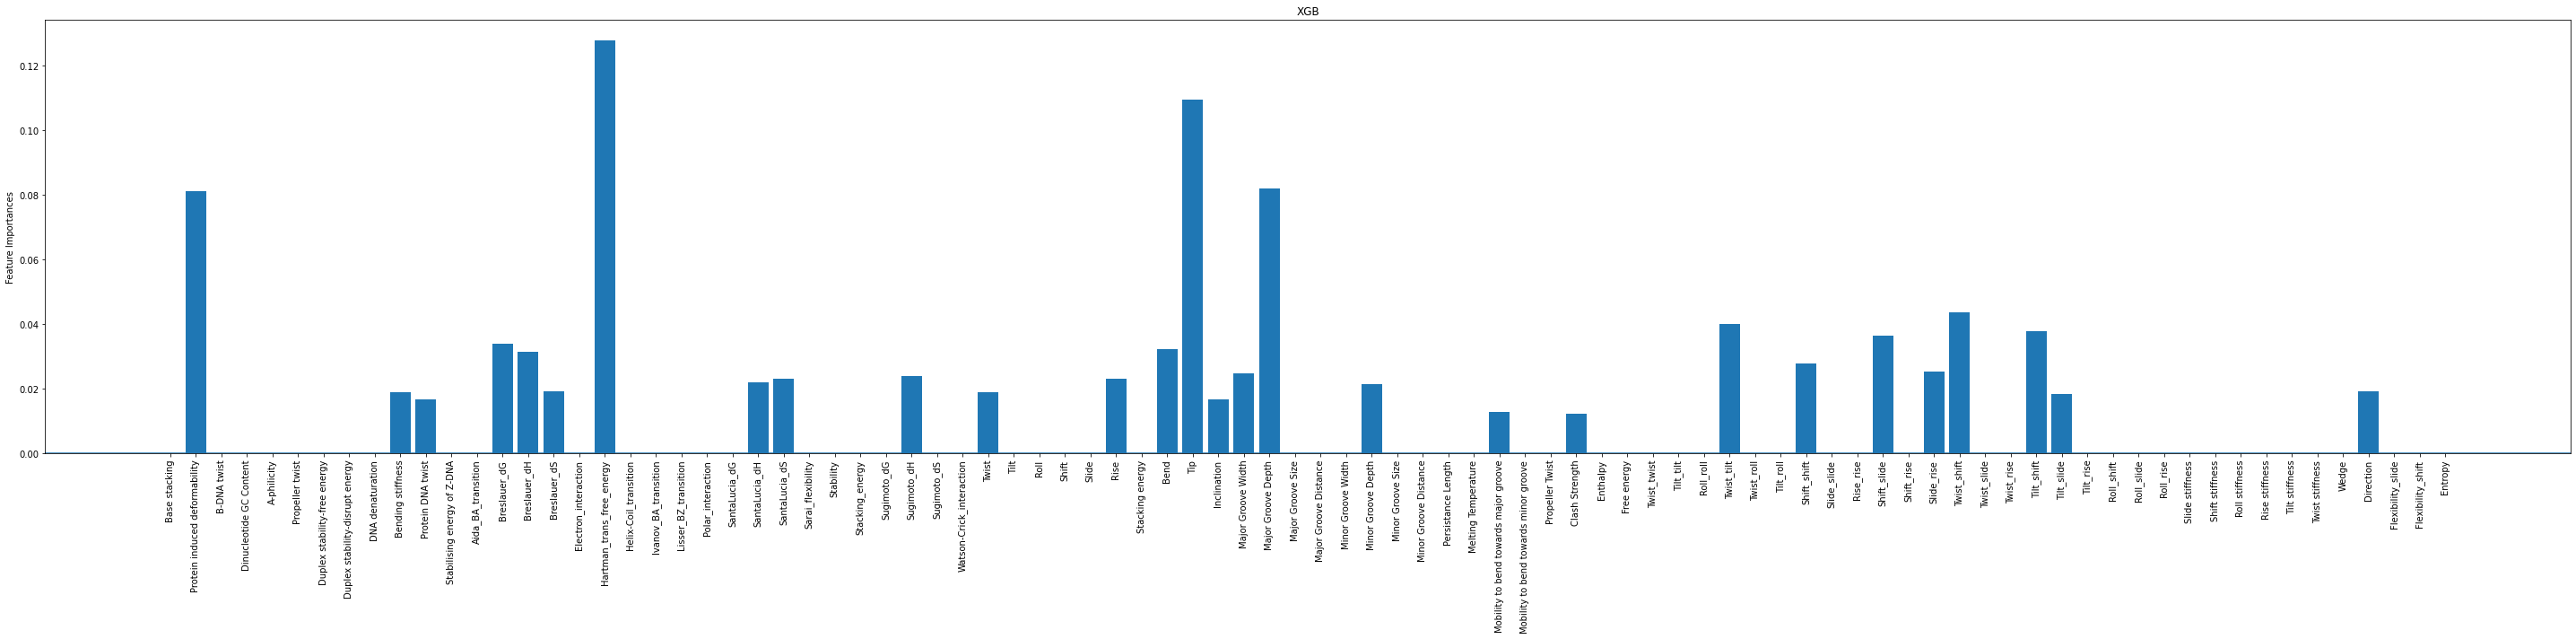

In [81]:
plt.figure(figsize=(40,10))
plt.bar(range(len(xgb_importances)),xgb_importances,align='center');
plt.ylabel('Feature Importances');
plt.title('XGB')
plt.axhline(y=0)
plt.xticks(range(0,len(zz.columns)),zz.columns)
plt.xticks(rotation=90);
plt.tight_layout()
plt.show()

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [83]:
param_grid={'max_depth':[1,2,3],'n_estimators':[10,25,50,75,100,250,500,1000],'learning_rate':[0.1,0.25,0.5,1.0],'subsample':[0.1,0.25,0.5,1.0],
           'warm_start':[True,False]}
gs_gb = GridSearchCV(GradientBoostingClassifier(),param_grid,cv=5,scoring='roc_auc')
gs_gb.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [84]:
gs_gb.best_params_

{'learning_rate': 0.25,
 'max_depth': 1,
 'n_estimators': 50,
 'subsample': 0.5,
 'warm_start': True}

In [85]:
best_gb = gs_gb.best_estimator_
best_gb.fit(x_train,y_train)
y_test_proba = best_gb.predict_proba(x_test)
gb_importances=best_gb.feature_importances_

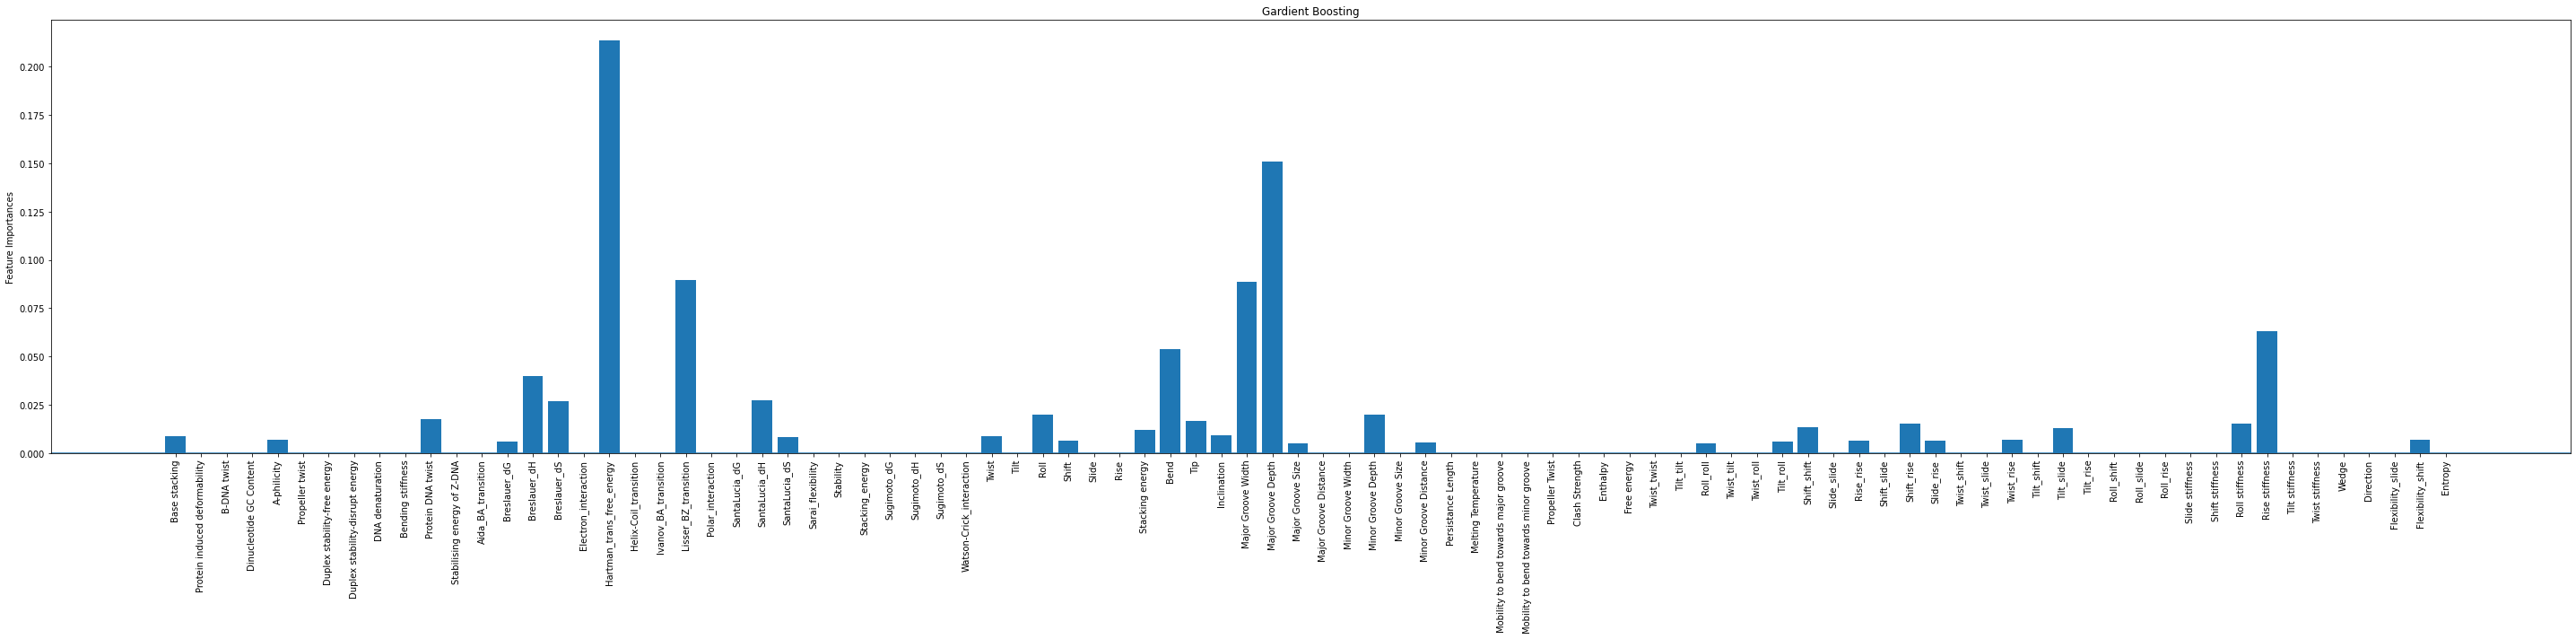

In [86]:
plt.figure(figsize=(40,10))
plt.bar(range(len(gb_importances)),gb_importances,align='center');
plt.ylabel('Feature Importances');
plt.title('Gardient Boosting')
plt.axhline(y=0)
plt.xticks(range(0,len(zz.columns)),zz.columns)
plt.xticks(rotation=90);
plt.tight_layout()
plt.show()

In [98]:
from sklearn.metrics import accuracy_score
accuracy_score(best_gb.predict(x_test),y_test)

0.7804878048780488

In [99]:
accuracy_score(best_xgb.predict(x_test),y_test)

0.7926829268292683

In [101]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000).fit(x_train,y_train)
accuracy_score(lr.predict(x_test),y_test)

0.7926829268292683

In [105]:
len(np.nonzero(y_train)[0]),len(y_train)

(359, 729)

In [87]:
np.mean((polyreg_scaled.predict(x_test)-y_test)**2)

0.1664882752953506

In [88]:
np.mean((linear_reg.predict(x_test)-y_test)**2)

0.1250952743902439

In [89]:
from sklearn.linear_model import Lasso
linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(x_train, y_train)
np.mean((linlasso.predict(x_test)-y_test)**2)

0.2509769916409049

In [90]:
from sklearn.svm import LinearSVC
#for c in range(5):
#  clf = LinearSVC(C=10**c).fit(x_train, y_train)
#  print(np.mean((clf.predict(x_test)-y_test)**2))
svc = LinearSVC(C=10**3,max_iter=10000).fit(x_train, y_train)
print(np.mean((svc.predict(x_test)-y_test)**2))

0.4024390243902439


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [106]:
accuracy_score(svc.predict(x_test),y_test)

0.5975609756097561

In [91]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier().fit(x_train,y_train)
print(np.mean((clf.predict(x_test)-y_test)**2))

0.3048780487804878


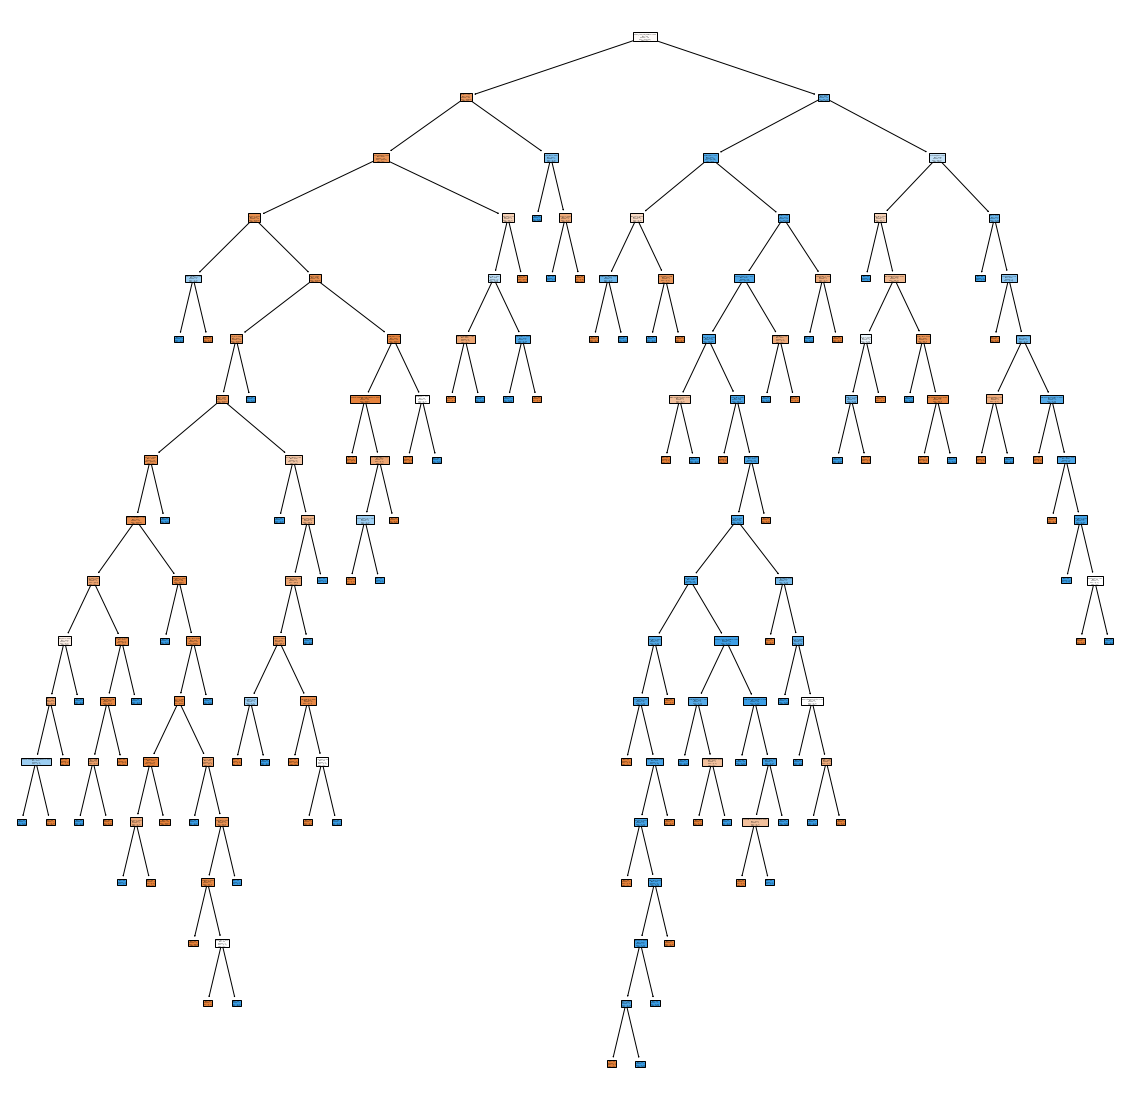

In [92]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(clf, 
                   feature_names=np.array(data_parameters["Physicochemical properties"]),  
                   class_names=["true","false"],
                   filled=True)
plt.show()

In [107]:
accuracy_score(clf.predict(x_test),y_test)

0.6951219512195121

In [93]:
y_train=np.array(y_train)

In [94]:
len(y_train)

729

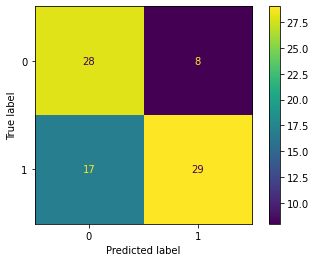

In [95]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, x_test, y_test)  
plt.show()  

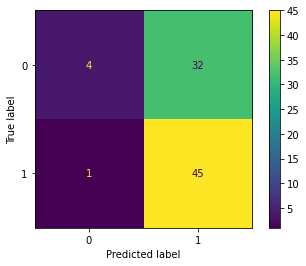

In [96]:
plot_confusion_matrix(svc, x_test, y_test)  
plt.show()

# Deep Neural Networks

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
model=keras.Sequential([
   keras.layers.Dense(1024,input_shape=(90,),activation=tf.nn.relu),
   keras.layers.Dense(512,activation=tf.nn.relu),
   keras.layers.Dense(5,activation=tf.nn.softmax)                     
])
model.summary()
model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy")
history=model.fit(x_train,y_train,epochs=10,batch_size=10)
model.evaluate(x_test,np.array(y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              93184     
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 2565      
Total params: 620,549
Trainable params: 620,549
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
73/73 [==============================] - 2s 2ms/step - loss: 0.6455
Epoch 2/10
73/73 [==============================] - 0s 2ms/step - loss: 0.4815
Epoch 3/10
73/73 [==============================] - 0s 2ms/step - loss: 0.4456
Epoch 4/10
73/73 [==============================] - 0s 2ms/step - loss: 0.4486
Epoch 5/10
73/73 [==============================] - 0s 2ms/step 

0.39218223094940186

In [ ]:
x_data=np.array(x_data)
y_data=np.array(y_data)

In [ ]:
x_data.shape,y_data.shape

((811, 298, 90), (811,))

In [ ]:
from sklearn.utils import shuffle
X, y = shuffle(x_data, y_data)
from sklearn.model_selection import train_test_split
x_train3,x_test3,y_train3,y_test3=train_test_split(X,y,test_size=0.1)
x_train3.shape,x_test3.shape
x_train3=x_train3.reshape(729,298, 90, 1)
x_test3 =x_test3.reshape(82,298, 90, 1)

# CNN

# Does order of parameters matter??

In [46]:
x_data=[]
y_data=[]
features1=data_parameters['Physicochemical properties']
for seq in range(len(p_data)):
  seq_data=[]
  for pos in range(0,298):
    seq_data.append(np.array(data_parameters[p_data[seq][pos:pos+2]]))
  x_data.append(seq_data)
  y_data.append(1)
for seq in range(len(n_data)):
  seq_data=[]
  for pos in range(0,298):
    seq_data.append(np.array(data_parameters[n_data[seq][pos:pos+2]]))
  x_data.append(seq_data)
  y_data.append(0) 

In [47]:
from sklearn.utils import shuffle
X, y = shuffle(x_data, y_data)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [48]:
x_data1=[]
y_data1=[]
data_parameters1=shuffle(data_parameters,random_state=0)
features2=data_parameters1['Physicochemical properties']
for seq in range(len(p_data)):
  seq_data=[]
  for pos in range(0,298):
    seq_data.append(np.array(data_parameters1[p_data[seq][pos:pos+2]]))
  x_data1.append(seq_data)
  y_data1.append(1)
for seq in range(len(n_data)):
  seq_data=[]
  for pos in range(0,298):
    seq_data.append(np.array(data_parameters1[n_data[seq][pos:pos+2]]))
  x_data1.append(seq_data)
  y_data1.append(0) 

In [49]:
shuffle(data_parameters)

,Physicochemical properties,GG,GA,GC,GT,AG,AA,AC,AT,CG,CA,CC,CT,TG,TA,TC,TT
45,Major Groove Distance,-0.05,0.02,-1.28,-1.31,-0.13,-0.05,-1.31,-1.35,1.35,1.42,-0.05,-0.13,1.42,1.49,0.02,-0.05
89,Entropy,1.17,-0.10,-1.32,-0.21,0.56,0.40,-0.21,0.90,-2.87,-0.38,1.17,0.56,-0.38,0.40,-0.10,0.40
26,Stability,0.50,0.52,2.52,0.97,-0.61,-0.77,0.97,-0.67,-0.76,-0.04,-0.76,0.50,-0.61,-1.49,0.52,-0.77
80,Shift stiffness,0.56,0.13,-0.35,0.13,0.68,1.59,0.13,-1.02,-0.82,-0.86,0.56,0.68,-0.86,-2.24,0.13,1.59
56,Enthalpy,-1.26,-0.09,-1.04,-0.42,1.14,0.36,-0.42,1.71,-1.77,0.25,-1.26,1.14,0.25,1.14,-0.09,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Tilt_roll,-0.73,-0.22,-0.73,1.30,-1.75,1.30,1.30,0.29,0.29,0.29,-0.73,-1.75,0.29,-0.22,-0.22,1.30
2,B-DNA twist,-0.06,1.11,0.79,-0.65,-1.33,0.00,-0.65,2.09,-1.14,0.60,-0.06,-1.33,0.60,-1.06,1.11,0.00
7,Duplex stability-disrupt energy,1.40,-0.50,1.40,-0.88,-0.50,-0.12,-0.88,-1.39,2.04,-0.12,1.40,-0.50,-0.12,-0.63,-0.50,-0.12
76,Roll_shift,-0.66,0.73,-0.48,1.01,-1.60,1.20,1.01,0.55,0.73,-0.48,-0.66,-1.60,-0.48,-1.22,0.73,1.20


In [50]:
from sklearn.utils import shuffle
X, y = shuffle(x_data1, y_data1)
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.1)

In [51]:
x_data2=[]
y_data2=[]
data_parameters2=shuffle(data_parameters,random_state=1)
features3=data_parameters2['Physicochemical properties']
for seq in range(len(p_data)):
  seq_data=[]
  for pos in range(0,298):
    seq_data.append(np.array(data_parameters2[p_data[seq][pos:pos+2]]))
  x_data2.append(seq_data)
  y_data2.append(1)
for seq in range(len(n_data)):
  seq_data=[]
  for pos in range(0,298):
    seq_data.append(np.array(data_parameters2[n_data[seq][pos:pos+2]]))
  x_data2.append(seq_data)
  y_data2.append(0) 

In [52]:
from sklearn.utils import shuffle
X, y = shuffle(x_data2, y_data2)
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2,y_test2=train_test_split(X,y,test_size=0.1)

In [53]:
x_train=np.array(x_train)
x_train1=np.array(x_train1)
x_train2=np.array(x_train2)

In [54]:
x_test=np.array(x_test)
x_test1=np.array(x_test1)
x_test2=np.array(x_test2)

In [55]:
x_train=x_train.reshape(729,298, 90, 1)
x_test=x_test.reshape(82,298, 90, 1)
x_train1=x_train1.reshape(729,298, 90, 1)
x_test1=x_test1.reshape(82,298, 90, 1)
x_train2=x_train2.reshape(729,298, 90, 1)
x_test2=x_test2.reshape(82,298, 90, 1)

In [56]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.initializers import RandomNormal, Constant

In [58]:
model=tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(2,2),activation="relu",input_shape=(298,90,1)),
  tf.keras.layers.MaxPooling2D(2,2),
  BatchNormalization(momentum=0.7, 
        epsilon=0.01,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.5), 
        gamma_initializer=Constant(value=0.9)),
  tf.keras.layers.Conv2D(64,(2,2),activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  BatchNormalization(momentum=0.7, 
        epsilon=0.01,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.5), 
        gamma_initializer=Constant(value=0.9)),
  tf.keras.layers.Flatten(),
  BatchNormalization(momentum=0.7, 
        epsilon=0.01,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.5), 
        gamma_initializer=Constant(value=0.9)),
  tf.keras.layers.Dense(64,activation="relu"),
  BatchNormalization(momentum=0.7, 
        epsilon=0.01,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.5), 
        gamma_initializer=Constant(value=0.9)),
  tf.keras.layers.Dense(2,activation="softmax")
])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.summary()
history=model.fit(x_train,y_train,epochs=10,batch_size=10,validation_data=(x_test,y_test))
test_loss=model.evaluate(x_test,y_test)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 297, 89, 32)       160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 148, 44, 32)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 44, 32)       128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 43, 64)       8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 21, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 73, 21, 64)        256       
_________________________________________________________________
flatten (Flatten)            (None, 98112)             0

In [59]:
x_train.shape,x_test.shape

((729, 298, 90, 1), (82, 298, 90, 1))

In [ ]:
y_train1=np.array(y_train1)
y_test1=np.array(y_test1)

In [ ]:
model1=tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(2,2),activation="relu",input_shape=(298,90,1)),
  tf.keras.layers.MaxPooling2D(2,2),
  BatchNormalization(momentum=0.7, 
        epsilon=0.01,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.5), 
        gamma_initializer=Constant(value=0.9)),
  tf.keras.layers.Conv2D(64,(2,2),activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  BatchNormalization(momentum=0.7, 
        epsilon=0.01,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.5), 
        gamma_initializer=Constant(value=0.9)),
  tf.keras.layers.Flatten(),
  BatchNormalization(momentum=0.7, 
        epsilon=0.01,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.5), 
        gamma_initializer=Constant(value=0.9)),
  tf.keras.layers.Dense(64,activation="relu"),
  BatchNormalization(momentum=0.7, 
        epsilon=0.01,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.5), 
        gamma_initializer=Constant(value=0.9)),
  tf.keras.layers.Dense(2,activation="softmax")
])
model1.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model1.summary()
history=model.fit(x_train1,y_train1,epochs=10,batch_size=10,validation_data=(x_test1,y_test1))
test_loss=model.evaluate(x_test1,y_test1)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 297, 89, 32)       160       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 148, 44, 32)       0         
_________________________________________________________________
batch_normalization_48 (Batc (None, 148, 44, 32)       128       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 147, 43, 64)       8256      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 73, 21, 64)        0         
_________________________________________________________________
batch_normalization_49 (Batc (None, 73, 21, 64)        256       
_________________________________________________________________
flatten_12 (Flatten)         (None, 98112)           

In [ ]:
y_train2=np.array(y_train2)
y_test2=np.array(y_test2)

In [ ]:
model2=tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(2,2),activation="relu",input_shape=(298,90,1)),
  tf.keras.layers.MaxPooling2D(2,2),
  BatchNormalization(momentum=0.7, 
        epsilon=0.01,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.5), 
        gamma_initializer=Constant(value=0.9)),
  tf.keras.layers.Conv2D(64,(2,2),activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  BatchNormalization(momentum=0.7, 
        epsilon=0.01,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.5), 
        gamma_initializer=Constant(value=0.9)),
  tf.keras.layers.Flatten(),
  BatchNormalization(momentum=0.7, 
        epsilon=0.01,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.5), 
        gamma_initializer=Constant(value=0.9)),
  tf.keras.layers.Dense(64,activation="relu"),
  BatchNormalization(momentum=0.7, 
        epsilon=0.01,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.5), 
        gamma_initializer=Constant(value=0.9)),
  tf.keras.layers.Dense(2,activation="softmax")
])
model2.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model2.summary()
history=model2.fit(x_train2,y_train2,epochs=10,batch_size=10,validation_data=(x_test2,y_test2))
test_loss=model2.evaluate(x_test2,y_test2)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 297, 89, 32)       160       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 148, 44, 32)       0         
_________________________________________________________________
batch_normalization_52 (Batc (None, 148, 44, 32)       128       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 147, 43, 64)       8256      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 73, 21, 64)        0         
_________________________________________________________________
batch_normalization_53 (Batc (None, 73, 21, 64)        256       
_________________________________________________________________
flatten_13 (Flatten)         (None, 98112)           

In [60]:
for ilayer, layer in enumerate(model.layers):
    print("{:3.0f} {:10}".format(ilayer, layer.name))

  0 conv2d    
  1 max_pooling2d
  2 batch_normalization
  3 conv2d_1  
  4 max_pooling2d_1
  5 batch_normalization_1
  6 flatten   
  7 batch_normalization_2
  8 dense     
  9 batch_normalization_3
 10 dense_1   


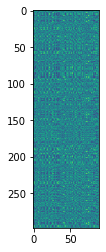

In [61]:
from keras.preprocessing.image import load_img, img_to_array
img=x_test1[0].reshape(298,90)
plt.imshow(img)
plt.show()

In [64]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(x_test1[0].reshape(1,298,90,1))
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index])
            activation_index += 1

[-67.15988  -66.37331  -59.918728 -65.455765 -57.62084  -92.522835
 -43.70928  -32.08546  -54.839043 -68.65469  -65.050705 -66.15578
 -54.48907  -72.07435  -71.01049  -60.26386  -70.74314  -81.85919
 -30.596712 -81.43313  -68.58909 ]


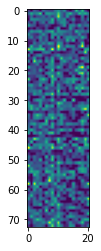

[ -72.96282   -72.549385  -81.26837   -80.48582   -62.323074 -103.631386
  -30.962564  -58.157856  -56.13237   -65.50634   -68.74492   -69.32085
  -79.28375   -72.6557    -77.35835   -70.21599   -66.4516    -72.84251
  -24.266916  -94.49084   -65.586754]


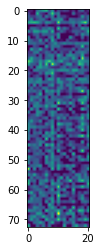

[ -68.42803   -82.875946  -79.21057   -71.866974  -68.7317   -107.44931
  -53.15157   -55.493813  -67.66885   -72.78867   -79.93437   -72.06519
  -73.52729   -72.20616   -84.655075  -70.08716   -73.67494   -90.542145
  -36.153015  -93.6984    -61.768898]


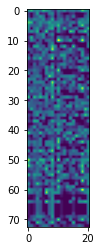

[ -71.422226  -73.101326  -79.90597   -58.594746  -55.719048 -106.71054
  -50.818462  -44.97986   -40.058247  -73.967476  -77.17295   -55.84655
  -71.97781   -73.40553   -87.144875  -67.839096  -71.62672   -64.88312
  -21.412186  -91.86589   -82.94308 ]


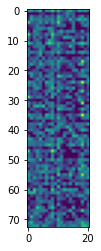

[-65.222855 -76.56029  -60.867878 -64.16259  -52.53735  -87.596954
 -33.36207  -46.787144 -47.665817 -90.72915  -75.380516 -62.45256
 -63.38602  -71.93203  -77.7859   -65.12357  -60.173615 -70.78584
 -22.422314 -75.601555 -74.09436 ]


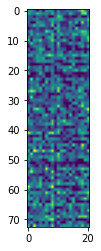

In [70]:
for i in range(0,100,20):  
  activations = activation_model.predict(x_test1[i].reshape(1,298,90,1))
  activation=activations[5]
  plt.imshow(activation[0, :, :, 0])
  print(activation[0,:,:,1].sum(axis=0))
  plt.show()

In [ ]:
np.array(features2)

array(['B-DNA twist', 'Breslauer_dG',
       'Mobility to bend towards minor groove', 'Inclination',
       'Rise_rise', 'Sugimoto_dS', 'Major Groove Distance',
       'Major Groove Depth', 'Roll_rise', 'Entropy',
       'Duplex stability-disrupt energy', 'Stability', 'Tilt',
       'Tilt_roll', 'DNA denaturation', 'Electron_interaction',
       'SantaLucia_dS', 'Enthalpy', 'Roll_slide', 'Major Groove Width',
       'SantaLucia_dG', 'Duplex stability-free energy', 'Twist_tilt',
       'Minor Groove Size', 'Shift stiffness', 'Propeller Twist',
       'Tilt_shift', 'Slide stiffness', 'Rise stiffness',
       'Dinucleotide GC Content', 'Twist_roll', 'Tilt_rise',
       'Stacking_energy', 'Helix-Coil_transition', 'Persistance Length',
       'Melting Temperature', 'Tilt_slide', 'Tilt_tilt', 'Clash Strength',
       'A-philicity', 'Breslauer_dS', 'Hartman_trans_free_energy', 'Tip',
       'Stacking energy', 'Propeller twist', 'Roll stiffness',
       'Shift_rise', 'Base stacking', 'Roll', '

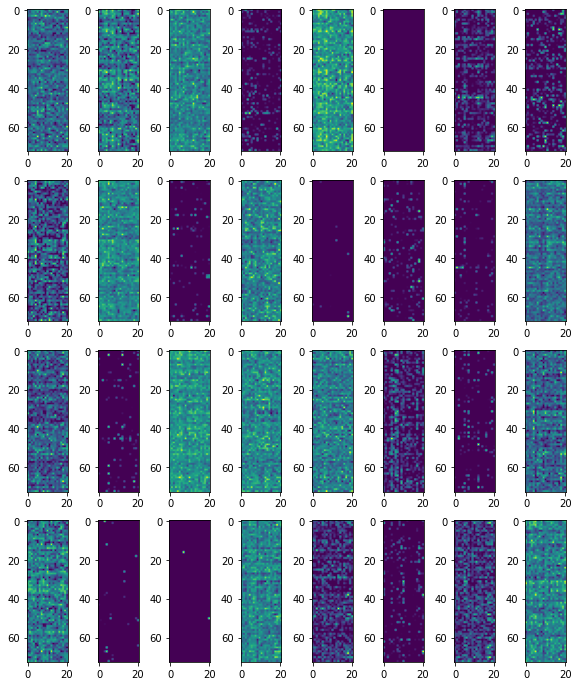

In [ ]:
display_activation(activations, 8, 4, 5)

In [ ]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(x_test[0].reshape(1,298,90,1))
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index])
            activation_index += 1

In [ ]:
np.array(features1)

array(['Base stacking', 'Protein induced deformability', 'B-DNA twist',
       'Dinucleotide GC Content', 'A-philicity', 'Propeller twist',
       'Duplex stability-free energy', 'Duplex stability-disrupt energy',
       'DNA denaturation', 'Bending stiffness', 'Protein DNA twist',
       'Stabilising energy of Z-DNA', 'Aida_BA_transition',
       'Breslauer_dG', 'Breslauer_dH', 'Breslauer_dS',
       'Electron_interaction', 'Hartman_trans_free_energy',
       'Helix-Coil_transition', 'Ivanov_BA_transition',
       'Lisser_BZ_transition', 'Polar_interaction', 'SantaLucia_dG',
       'SantaLucia_dH', 'SantaLucia_dS', 'Sarai_flexibility', 'Stability',
       'Stacking_energy', 'Sugimoto_dG', 'Sugimoto_dH', 'Sugimoto_dS',
       'Watson-Crick_interaction', 'Twist', 'Tilt', 'Roll', 'Shift',
       'Slide', 'Rise', 'Stacking energy', 'Bend', 'Tip', 'Inclination',
       'Major Groove Width', 'Major Groove Depth', 'Major Groove Size',
       'Major Groove Distance', 'Minor Groove Width',
   

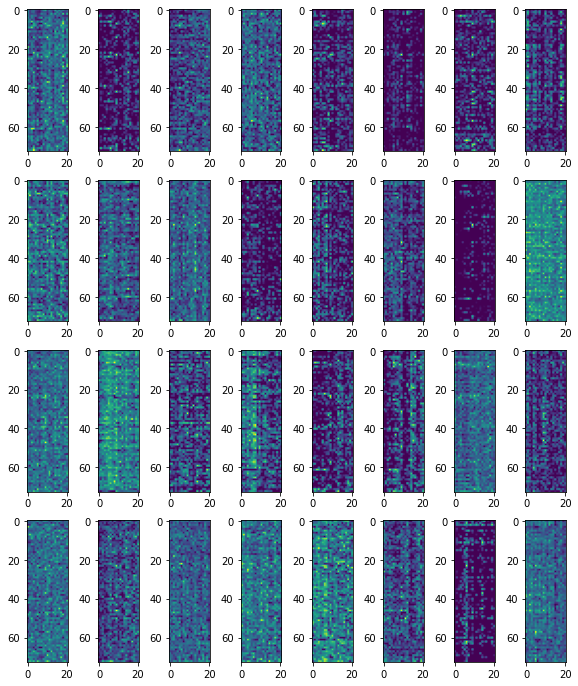

In [ ]:
display_activation(activations, 8, 4, 5)

In [ ]:
from keras.models import Model
layer_outputs = [layer.output for layer in model2.layers]
activation_model = Model(inputs=model2.input, outputs=layer_outputs)
activations = activation_model.predict(x_test2[0].reshape(1,298,90,1))
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index])
            activation_index += 1

In [ ]:
np.array(features3)

array(['Twist_twist', 'Roll_rise', 'Major Groove Depth', 'Clash Strength',
       'Flexibility_slide', 'Tilt_slide', 'Roll_roll',
       'Mobility to bend towards major groove', 'Minor Groove Width',
       'Bend', 'Tip', 'Watson-Crick_interaction', 'Slide_rise',
       'Stacking_energy', 'Stacking energy', 'Shift_rise',
       'Protein DNA twist', 'B-DNA twist', 'Entropy', 'Twist_shift',
       'Mobility to bend towards minor groove', 'Ivanov_BA_transition',
       'Twist stiffness', 'Slide', 'Tilt', 'Twist',
       'Major Groove Distance', 'Rise_rise', 'Twist_roll',
       'Propeller Twist', 'Shift', 'Inclination', 'Minor Groove Distance',
       'SantaLucia_dH', 'Roll', 'Tilt stiffness', 'Major Groove Size',
       'Tilt_tilt', 'Breslauer_dS', 'Tilt_shift', 'Roll stiffness',
       'Stability', 'Flexibility_shift', 'Enthalpy', 'A-philicity',
       'Minor Groove Size', 'Polar_interaction', 'Roll_slide',
       'Dinucleotide GC Content', 'Slide_slide', 'Sugimoto_dS',
       'Rise sti

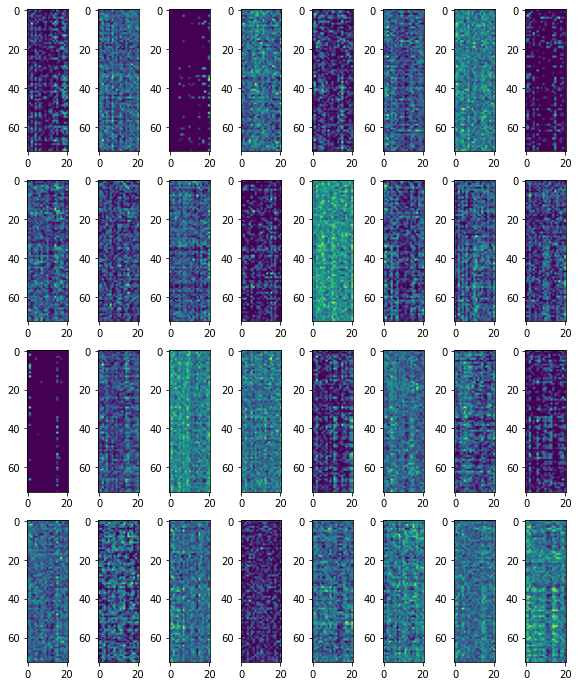

In [ ]:
display_activation(activations, 8, 4, 5)

# Convolutional Neural Networks Test Case



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.initializers import RandomNormal, Constant

model2=tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(2,2),activation="relu",input_shape=(298,90,1)),
  tf.keras.layers.MaxPooling2D(2,2),
  BatchNormalization(momentum=0.7, 
        epsilon=0.01,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.5), 
        gamma_initializer=Constant(value=0.9)),
  tf.keras.layers.Conv2D(64,(2,2),activation="relu",input_shape=(298,90,1)),
  tf.keras.layers.MaxPooling2D(2,2),
  BatchNormalization(momentum=0.7, 
        epsilon=0.01,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.5), 
        gamma_initializer=Constant(value=0.9)),
  tf.keras.layers.Flatten(),
  BatchNormalization(momentum=0.7, 
        epsilon=0.01,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.5), 
        gamma_initializer=Constant(value=0.9)),
  tf.keras.layers.Dense(64,activation="relu"),
  BatchNormalization(momentum=0.7, 
        epsilon=0.01,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.5), 
        gamma_initializer=Constant(value=0.9)),
  tf.keras.layers.Dense(2,activation="softmax")
])
model2.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model2.summary()
history=model2.fit(x_train3,y_train3,epochs=10,batch_size=10,validation_data=(x_test3,y_test3))
test_loss2=model2.evaluate(x_test3,y_test3)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 297, 89, 32)       160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 148, 44, 32)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 44, 32)       128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 43, 64)       8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 21, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 73, 21, 64)        256       
_________________________________________________________________
flatten (Flatten)            (None, 98112)            

In [ ]:
test_loss2

[0.6188861727714539, 0.8414633870124817]

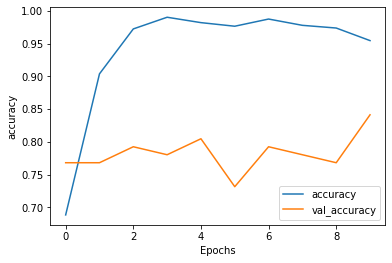

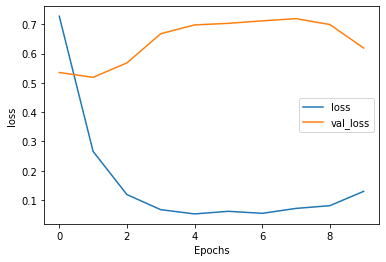

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")